In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [26]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.39478463, -0.47733945, -0.62658822, -0.41369596, -0.45659303,
         0.64466116, -0.51866429,  0.34584009, -0.77242683, -1.06658927],
       [-0.50506762, -0.33516347, -0.60246564, -0.1412795 , -0.28646944,
         0.32086823,  0.28396083,  0.46349567, -0.3731652 , -1.75512429]])

In [27]:
test_Features[:2]

array([[-0.76128437, -0.42001772, -1.09549736,  1.92591282,  1.55502797,
        -0.07316597, -0.02817606,  0.43495565,  2.11370464, -1.91902405],
       [-0.73935288, -0.27139332, -1.09422775,  1.12069792,  0.84467147,
        -0.63825472,  0.10624677,  0.78811445,  0.03643243, -1.91993935]])

In [28]:
train_Label[:4]

array([1, 1, 0, 0])

In [29]:
train_Features.shape

(15216, 10)

In [30]:
test_Label[:4]

array([0, 0, 0, 1])

In [31]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [32]:
model = Sequential()

In [33]:
model.add(Dense(units=10*5,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [34]:
model.add(Dense(units=10*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [35]:
model.add(Dense(units=10*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [36]:
model.add(Dense(units=10*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [37]:
model.add(Dense(units=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [38]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_8 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 4,661
Trainable params: 4,661
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [41]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 2s - loss: 0.6900 - acc: 0.6509 - val_loss: 0.6851 - val_acc: 0.6583
Epoch 2/30
 - 0s - loss: 0.6608 - acc: 0.6508 - val_loss: 0.5834 - val_acc: 0.6583
Epoch 3/30
 - 0s - loss: 0.5207 - acc: 0.6526 - val_loss: 0.4845 - val_acc: 0.7024
Epoch 4/30
 - 0s - loss: 0.4675 - acc: 0.7920 - val_loss: 0.4328 - val_acc: 0.8055
Epoch 5/30
 - 0s - loss: 0.4078 - acc: 0.8174 - val_loss: 0.3902 - val_acc: 0.8298
Epoch 6/30
 - 0s - loss: 0.3828 - acc: 0.8356 - val_loss: 0.3783 - val_acc: 0.8384
Epoch 7/30
 - 0s - loss: 0.3734 - acc: 0.8430 - val_loss: 0.3727 - val_acc: 0.8482
Epoch 8/30
 - 0s - loss: 0.3655 - acc: 0.8485 - val_loss: 0.3675 - val_acc: 0.8541
Epoch 9/30
 - 0s - loss: 0.3588 - acc: 0.8528 - val_loss: 0.3555 - val_acc: 0.8601
Epoch 10/30
 - 0s - loss: 0.3505 - acc: 0.8564 - val_loss: 0.3505 - val_acc: 0.8587
Epoch 11/30
 - 0s - loss: 0.3440 - acc: 0.8600 - val_loss: 0.3445 - val_acc: 0.8633
Epoch 12/30
 - 0s - loss: 0.3403 - a

In [42]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

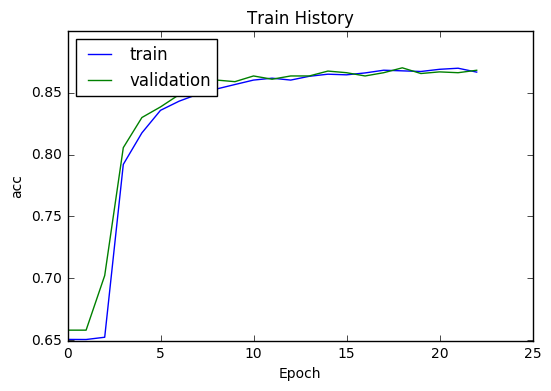

In [43]:
show_train_history(train_history,'acc','val_acc')

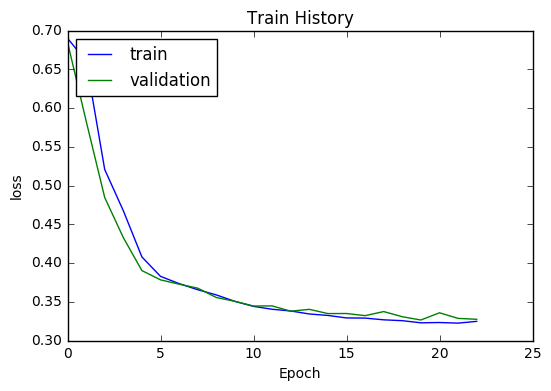

In [44]:
show_train_history(train_history,'loss','val_loss')

In [45]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 49us/step


In [46]:
scores[1]

0.8635646689577433